# Logistic Regression

## A prediction for binary response using a quantitative predictor.


If you have a binary response and a quantitative predictor (we'll also be able to do logistic regression with categorical predictors too, but first let's do it with quantitative predictors).  

![Logistic Curve](LogCurve.gif)


In [2]:
from datascience import *
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import scipy.stats as stats
import statsmodels.api as sm 

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=np.VisibleDeprecationWarning)


In [3]:
divorce = pd.read_csv("divorce2.csv")

divorce

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr51,Atr52,Atr53,Atr54,Class,Positive Sum,Negative Sum,Intercept,Positive Scale,Negative Scale
0,2,2,4,1,0,0,0,0,0,0,...,2,3,2,1,1,15,44,1,0.500000,1.833333
1,4,4,4,4,4,0,0,4,4,4,...,4,4,2,2,1,75,62,1,2.500000,2.583333
2,2,2,2,2,1,3,2,1,1,2,...,1,2,2,2,1,64,47,1,2.133333,1.958333
3,3,2,3,2,3,3,3,3,3,3,...,3,2,2,2,1,74,57,1,2.466667,2.375000
4,2,2,1,1,1,1,0,0,0,0,...,2,2,1,0,1,25,29,1,0.833333,1.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,4,2,2,2,0,0,36,1,0.000000,1.500000
166,0,0,0,0,0,0,0,0,0,0,...,2,3,2,2,0,0,36,1,0.000000,1.500000
167,1,1,0,0,0,0,0,0,0,1,...,1,3,0,0,0,11,27,1,0.366667,1.125000
168,0,0,0,0,0,0,0,0,0,0,...,2,4,3,1,0,1,37,1,0.033333,1.541667


I found this [Split or Stay: Divorce Predictor Dataset](https://www.kaggle.com/datasets/rabieelkharoua/split-or-stay-divorce-predictor-dataset/data) on Kaggle.  I copied the rest of this Markdown cell directly from the description of the data set on the webpage.  

There are 54 questions, labeled Atr1 to Atr54, corresponding to Question 1 to Question 54.

The last column is the status column, which indicates whether the individual is 'Married' or 'Divorced'. It is represented by a Boolean variable, where 'Married' is represented as '1' and 'Divorced' as '0'."

Survey questions:
1.  When one of our apologies apologizes when our discussions go in a bad direction, the issue does not extend.
2.  I know we can ignore our differences, even if things get hard sometimes.
3.  When we need it, we can take our discussions with my wife from the beginning and correct it.
4.  When I argue with my wife, it will eventually work for me to contact him.
5.  The time I spent with my wife is special for us.
6.  We don't have time at home as partners.
7.  We are like two strangers who share the same environment at home rather than family.
8.  I enjoy our holidays with my wife.
9.  I enjoy traveling with my wife.
10.  My wife and most of our goals are common.
11.  I think that one day in the future, when I look back, I see that my wife and I are in harmony with each other.
12.  My wife and I have similar values in terms of personal freedom.
13.  My husband and I have similar entertainment.
14.  Most of our goals for people (children, friends, etc.) are the same.
15.  Our dreams of living with my wife are similar and harmonious
16.  We're compatible with my wife about what love should be
17.  We share the same views with my wife about being happy in your life
18.  My wife and I have similar ideas about how marriage should be
19.  My wife and I have similar ideas about how roles should be in marriage
20.  My wife and I have similar values in trust
21.  I know exactly what my wife likes.
22.  I know how my wife wants to be taken care of when she's sick.
23.  I know my wife's favorite food.
24.  I can tell you what kind of stress my wife is facing in her life.
25.  I have knowledge of my wife's inner world.
26.  I know my wife's basic concerns.
27.  I know what my wife's current sources of stress are.
28.  I know my wife's hopes and wishes.
29.  I know my wife very well.
30.  I know my wife's friends and their social relationships.
31.  I feel aggressive when I argue with my wife.
32.  When discussing with my wife, I usually use expressions such as …..
33.  I can use negative statements about my wife's personality during our discussions.
34.  I can use offensive expressions during our discussions.
35.  I can insult our discussions.
36.  I can be humiliating when we argue.
37.  My argument with my wife is not calm.
38.  I hate my wife's way of bringing it up.
39.  Fights often occur suddenly.
40.  We're just starting a fight before I know what's going on.
41.  When I talk to my wife about something, my calm suddenly breaks.
42.  When I argue with my wife, it only snaps in and I don't say a word.
43.  I'm mostly thirsty to calm the environment a little bit.
44.  Sometimes I think it's good for me to leave home for a while.
45.  I'd rather stay silent than argue with my wife.
46.  Even if I'm right in the argument, I'm thirsty not to upset the other side.
47.  When I argue with my wife, I remain silent because I am afraid of not being able to control my anger.
48.  I feel right in our discussions.
49.  I have nothing to do with what I've been accused of.
50.  I'm not actually the one who's guilty about what I'm accused of.
51.  I'm not the one who's wrong about problems at home.
52.  I wouldn't hesitate to tell her about my wife's inadequacy.
53.  When I discuss it, I remind her of my wife's inadequate issues.
54.  I'm not afraid to tell her about my wife's incompetence.

We can run a logistic regression using this code below.  

In [111]:
x_vars = sm.add_constant(divorce[[ "Atr1"]])

y_var = divorce[["Class"]]

log_reg1 = sm.Logit(y_var, x_vars).fit()

log_reg1.summary()

Optimization terminated successfully.
         Current function value: 0.213110
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  170
Model:                          Logit   Df Residuals:                      168
Method:                           MLE   Df Model:                            1
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                  0.6925
Time:                        17:38:26   Log-Likelihood:                -36.229
converged:                       True   LL-Null:                       -117.82
Covariance Type:            nonrobust   LLR p-value:                 2.274e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8786      0.680     -5.702      0.000      -5.212      -2.546
Atr1           2.0682      0.291      7.110      0.000       1.498       2.638
==============================================================================
"""

In [166]:
y_hat1 = log_reg1.predict()

y_hat1

array([ 0.56409872,  0.98780247,  0.56409872,  0.91101012,  0.56409872,
        0.02026033,  0.91101012,  0.56409872,  0.56409872,  0.14058926,
        0.98780247,  0.98780247,  0.91101012,  0.91101012,  0.91101012,
        0.98780247,  0.98780247,  0.98780247,  0.91101012,  0.98780247,
        0.98780247,  0.98780247,  0.91101012,  0.91101012,  0.98780247,
        0.91101012,  0.91101012,  0.91101012,  0.91101012,  0.98780247,
        0.91101012,  0.98780247,  0.98780247,  0.91101012,  0.91101012,
        0.91101012,  0.98780247,  0.91101012,  0.91101012,  0.98780247,
        0.91101012,  0.98780247,  0.91101012,  0.91101012,  0.98780247,
        0.91101012,  0.91101012,  0.91101012,  0.98780247,  0.91101012,
        0.98780247,  0.91101012,  0.98780247,  0.91101012,  0.98780247,
        0.98780247,  0.91101012,  0.91101012,  0.91101012,  0.91101012,
        0.91101012,  0.91101012,  0.91101012,  0.91101012,  0.91101012,
        0.91101012,  0.91101012,  0.98780247,  0.91101012,  0.98

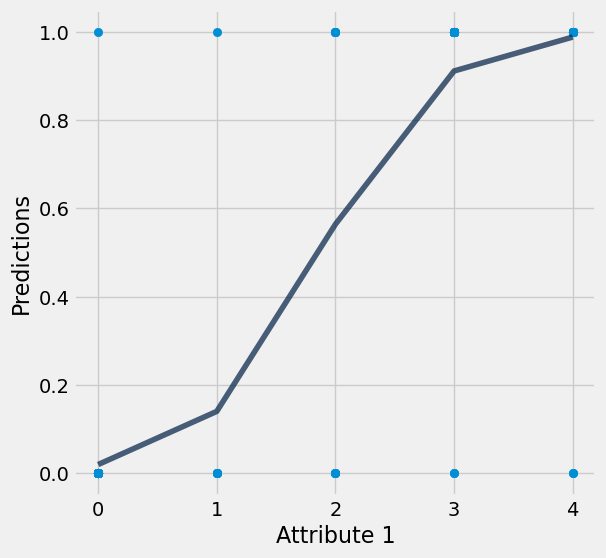

In [167]:
Table().with_columns("Predictions", y_hat, "Attribute 1", divorce["Atr1"].to_numpy()).plot("Attribute 1")
plots.scatter(divorce["Atr1"].to_numpy(), divorce["Class"].to_numpy());

If you read the items it would seem that items 1-30 are mostly positively coded and the rest are negatively coded.  So, we created four new variables, the sums and averages of the positively and negatively coded variables.  

In [127]:
x_vars = sm.add_constant(divorce[["Positive Scale"]])

log_reg_pos_scale = sm.Logit(y_var, x_vars).fit()

log_reg_pos_scale.summary()

Optimization terminated successfully.
         Current function value: 0.046569
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  170
Model:                          Logit   Df Residuals:                      168
Method:                           MLE   Df Model:                            1
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                  0.9328
Time:                        17:47:15   Log-Likelihood:                -7.9166
converged:                       True   LL-Null:                       -117.82
Covariance Type:            nonrobust   LLR p-value:                 9.934e-50
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -7.3300      1.921     -3.815      0.000     -11.096      -3.564
Positive Scale     9.7004      3.214      3.018      0.003       3.401      16.000
==================================================================================

Possibly complete quasi-separation: A fraction 0.46 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [134]:
y_hat2 = log_reg_pos_scale.predict()

#y_hat2

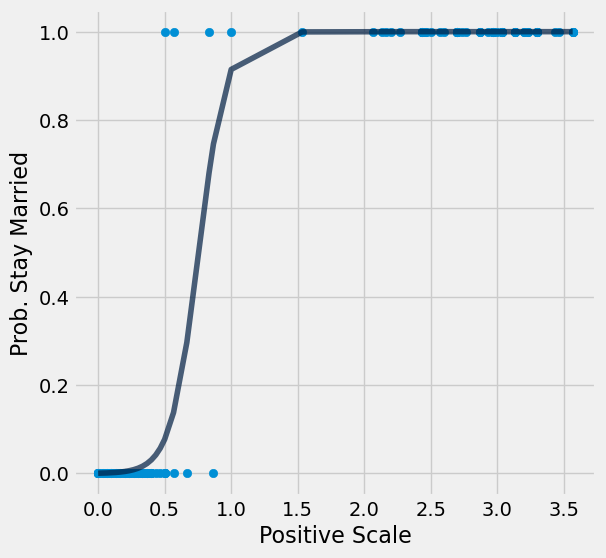

In [168]:
Table().with_columns("Prob. Stay Married", y_hat2, "Positive Scale", divorce["Positive Scale"].to_numpy()).plot("Positive Scale")
plots.scatter(divorce["Positive Scale"].to_numpy(), divorce["Class"].to_numpy());

Recall, in this divorce data set a 1 under Class means that the couple did not divorce, they stayed married.  So this data shows that if you and your spouse rate high on first set of questions (1 to 30), you are very likely to stay married.  

In a homework, you'll look into using some of the other variables in a logistic regression.  


In [93]:
x_vars = divorce[["Intercept", "Atr39"]]
y_var = divorce[["Class"]]

log_reg3 = sm.Logit(y_var, x_vars).fit()

Optimization terminated successfully.
         Current function value: 0.152364
         Iterations 8


In [94]:
log_reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  170
Model:                          Logit   Df Residuals:                      168
Method:                           MLE   Df Model:                            1
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                  0.7802
Time:                        16:54:28   Log-Likelihood:                -25.902
converged:                       True   LL-Null:                       -117.82
Covariance Type:            nonrobust   LLR p-value:                 7.022e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.1489      0.879     -5.859      0.000      -6.871      -3.426
Atr39          2.4311      0.389      6.247      0.000       1.668       3.194
==============================================================================
"""

In [ ]:
y_hat3 = log_reg3.predict()

# Interpreting the coefficient(s) and p-values




## Alzheimer's Data

Consider this data on Alzheimers, where a Diagnosis of 1 means that the person was diagnosed with alzheimers.  



In [1]:
alz = pd.read_csv("alzheimers_disease_data_train.csv")

alz

NameError: name 'pd' is not defined

Optimization terminated successfully.
         Current function value: 0.592395
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2147
Method:                           MLE   Df Model:                            1
Date:                Mon, 01 Jul 2024   Pseudo R-squ.:                 0.08817
Time:                        18:44:49   Log-Likelihood:                -1273.1
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                 1.747e-55
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5845      0.089      6.559      0.000       0.410       0.759
ADL           -0.2543      0.

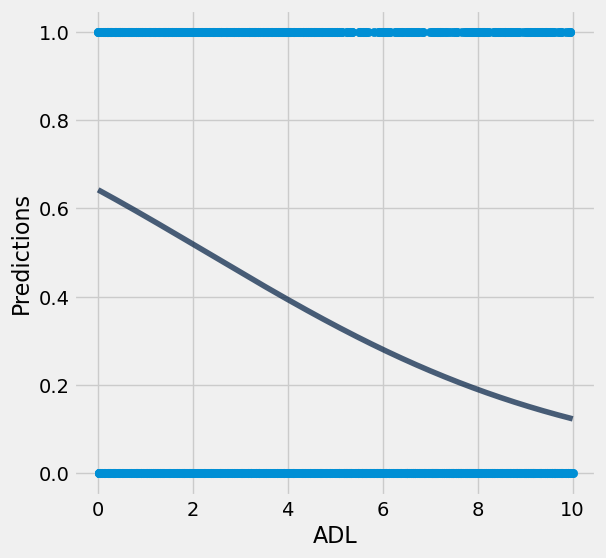

In [169]:
name = "ADL"

x_vars = sm.add_constant(alz[[name]])
y_var = alz[["Diagnosis"]]

log_reg4 = sm.Logit(y_var, x_vars).fit()
print(log_reg4.summary())

y_hat4 = log_reg4.predict()

Table().with_columns("Predictions", y_hat4, name, alz[name].to_numpy()).plot(name)
plots.scatter(alz[[name]].to_numpy(), alz[["Diagnosis"]].to_numpy());


Optimization terminated successfully.
         Current function value: 0.649661
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2147
Method:                           MLE   Df Model:                            1
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:               2.720e-05
Time:                        18:50:23   Log-Likelihood:                -1396.1
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                    0.7829
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6245      0.090     -6.938      0.000      -0.801      -0.448
PhysicalAct

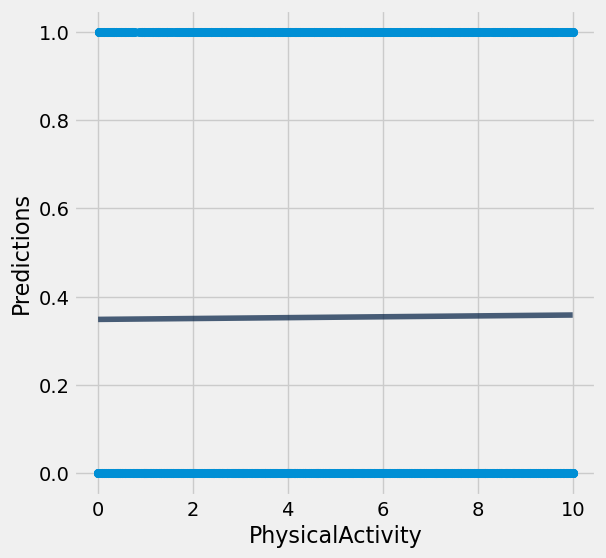

In [164]:
name = "PhysicalActivity"

x_vars = sm.add_constant(alz[[name]])
y_var = alz[["Diagnosis"]]

log_reg3 = sm.Logit(y_var, x_vars).fit()
print(log_reg3.summary())

y_hat3 = log_reg3.predict()

Table().with_columns("Predictions", y_hat3, name, alz[name].to_numpy()).plot(name)
plots.scatter(alz[[name]].to_numpy(), alz[["Diagnosis"]].to_numpy());

Optimization terminated successfully.
         Current function value: 0.649642
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2147
Method:                           MLE   Df Model:                            1
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:               5.568e-05
Time:                        18:41:28   Log-Likelihood:                -1396.1
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                    0.6933
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6336      0.090     -7.052      0.000      -0.810      -0.458
DietQuality     0.0061    

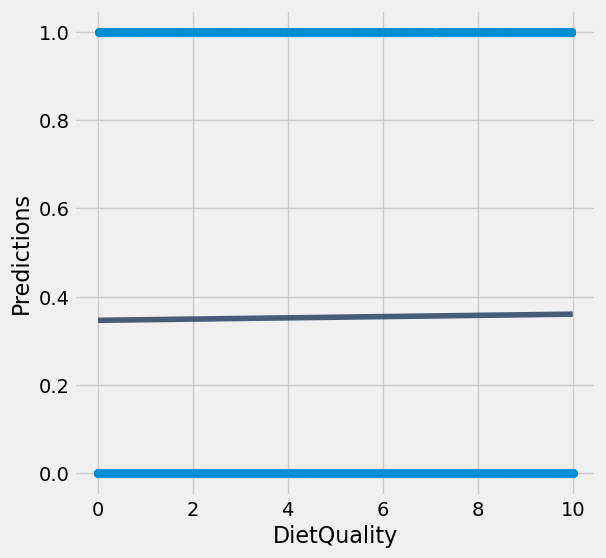

In [163]:
name = "DietQuality"

x_vars = sm.add_constant(alz[[name]])
y_var = alz[["Diagnosis"]]

log_reg3 = sm.Logit(y_var, x_vars).fit()
print(log_reg3.summary())

y_hat3 = log_reg3.predict()

Table().with_columns("Predictions", y_hat3, name, alz[name].to_numpy()).plot(name)
plots.scatter(alz[[name]].to_numpy(), alz[["Diagnosis"]].to_numpy());

Optimization terminated successfully.
         Current function value: 0.649664
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2147
Method:                           MLE   Df Model:                            1
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:               2.318e-05
Time:                        18:12:41   Log-Likelihood:                -1396.1
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                    0.7992
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5074      0.379     -1.340      0.180      -1.249       0.235
Age           -0.0013      0.

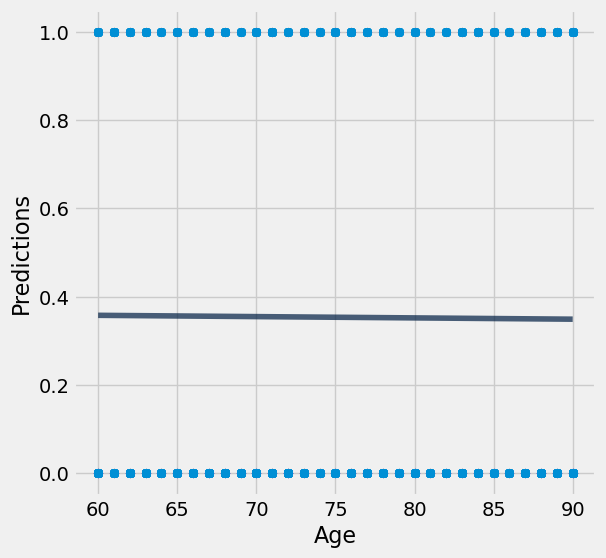

In [160]:
name = "Age"

x_vars = sm.add_constant(alz[[name]])
y_var = alz[["Diagnosis"]]

log_reg3 = sm.Logit(y_var, x_vars).fit()
print(log_reg3.summary())

y_hat3 = log_reg3.predict()

Table().with_columns("Predictions", y_hat3, name, alz[name].to_numpy()).plot(name)
plots.scatter(alz[[name]].to_numpy(), alz[["Diagnosis"]].to_numpy());


Optimization terminated successfully.
         Current function value: 0.649332
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2147
Method:                           MLE   Df Model:                            1
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:               0.0005343
Time:                        18:10:38   Log-Likelihood:                -1395.4
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                    0.2219
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8148      0.180     -4.537      0.000      -1.167      -0.463
BMI            0.0076      0.

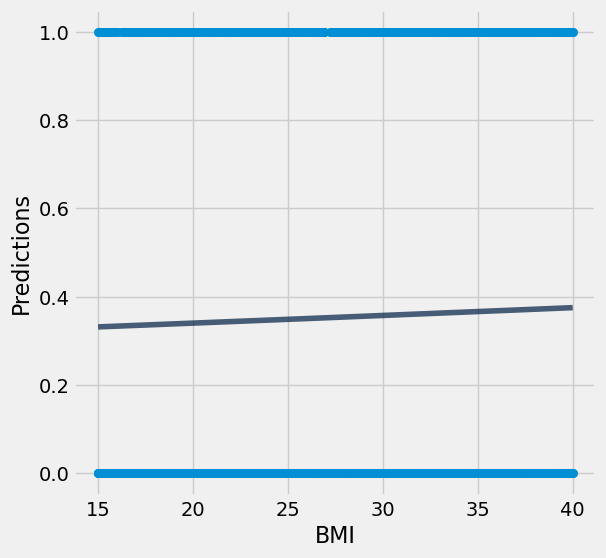

In [159]:
name = "BMI"

x_vars = sm.add_constant(alz[[name]])
y_var = alz[["Diagnosis"]]

log_reg3 = sm.Logit(y_var, x_vars).fit()
print(log_reg3.summary())

y_hat3 = log_reg3.predict()

Table().with_columns("Predictions", y_hat3, name, alz[name].to_numpy()).plot(name)
plots.scatter(alz[[name]].to_numpy(), alz[["Diagnosis"]].to_numpy());


In [150]:
y_hat3 = log_reg3.predict()

y_hat3

array([ 0.35420596,  0.34954518,  0.35420596, ...,  0.35303812,
        0.35274644,  0.35449819])

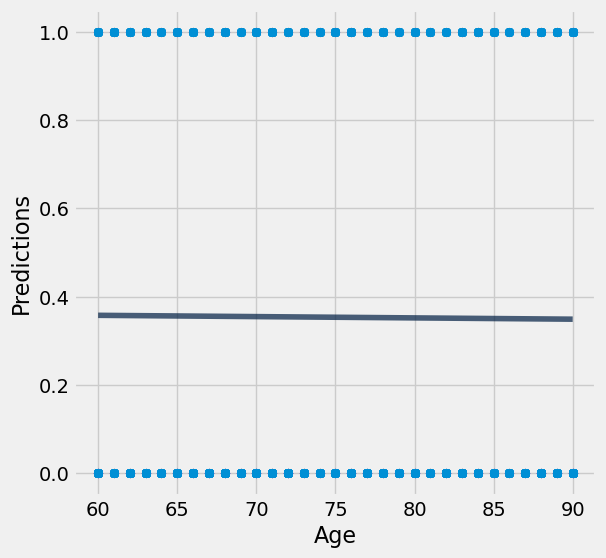

In [154]:
Table().with_columns("Predictions", y_hat3, "Age", alz["Age"].to_numpy()).plot("Age")
plots.scatter(alz[["Age"]].to_numpy(), alz[["Diagnosis"]].to_numpy());

## Multiple Logistic Regression  





In [90]:
log_reg_multiple1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  170
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            4
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                  0.8418
Time:                        16:52:57   Log-Likelihood:                -18.638
converged:                       True   LL-Null:                       -117.82
Covariance Type:            nonrobust   LLR p-value:                 8.421e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3264      1.180     -5.362      0.000      -8.639      -4.014
Atr1           1.2470      0.427      2.924      0.003       0.411       2.083
Atr2           0.6687      0.504      1.327      0.185      -0.319       1.657
Atr32          1.2574      0.381      3.296      0.001       0.510       2.005
Atr50          0.4267      0.457      0.935      0.350      -0.468       1.321
==============================================================================
"""